In [1]:
#This code imports the three source files from usafacts
#It produces multiple dataframes:
#1. cases_by_county_df: confirmed cases by county, by day from 1/22/20 to 6/15/20, including a column for country population.
#2. cases_by_state_df: a group-by of #1, organised into US States.
#3. deaths_by_county_df: confirmed deaths by county, by day from 1/22/20 to 6/15/20, including a column for country population.
#4. deaths_by_state_df: a group-by of #3, organised into US States.
#5. rates_by_county_df: #3 divivded by #1, to get deaths / cases per day by county.
#6. rates_by_state_df: #4 divivded by #2, to get deaths / cases per day by state.
#7. cases_by_state_per_capita - NOT COMPLETE
#8. deaths_by_state_per_capita - NOT COMPLETE
#9. rates_by_state_per_capita - NOT COMPLETE

#There are also some basic graphs.

In [2]:
# Dependencies and Setup
import os
import pandas as pd

In [3]:
#import csv files from output path
file_path = os.path.join('source_data', 'covid_confirmed_usafacts.csv')
cases_by_county_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('source_data', 'covid_deaths_usafacts.csv')
deaths_by_county_df = pd.read_csv(file_path,encoding="utf-8")

file_path = os.path.join('source_data', 'covid_county_population_usafacts.csv')
county_pop_df = pd.read_csv(file_path, encoding="utf-8")

In [4]:
#create new columns for county+state (because lots of duplicate county names in different states)
county_pop_df["County&State"] = county_pop_df['County Name'] + ',' + county_pop_df['State']
deaths_by_county_df["County&State"] = deaths_by_county_df['County Name'] + ',' + deaths_by_county_df['State']
cases_by_county_df["County&State"] = cases_by_county_df['County Name'] + ',' + cases_by_county_df['State']

In [5]:
# #data clean up - some county names in deaths_by_county_df are not the same in other dataframes.
# deaths_by_county_df['County&State'] = deaths_by_county_df['County&State'].replace({'Broomfield County and City,CO': 'Broomfield County,CO', 
#                                                                        'Matthews County,VA': 'Mathews County,VA'})

In [6]:
#data clean up - some county names in deaths_by_county_df are not the same in other dataframes.
deaths_by_county_df['County&State'] = deaths_by_county_df['County&State'].replace({'Broomfield County,CO': 'Broomfield County and City,CO', 
                                                                       'Mathews County,VA': 'Matthews County,VA',
                                                                        'Lac qui Parle County,MN': 'Lac Qui Parle County,MN',          
                                                                         'Alexandria city,VA': 'Alexandria City,VA',
                                                                                   'Charlottesville city,VA': 'Charlottesville City,VA',
                                                                                   'Chesapeake city,VA': 'Chesapeake City,VA',
                                                                                   'Danville city,VA': 'Danville City,VA',
                                                                                   'Fredericksburg city,VA': 'Fredericksburg City,VA',
                                                                                   'Harrisonburg city,VA': 'Harrisonburg City,VA',
                                                                                   'Manassas city,VA': 'Manassas City,VA',
                                                                                   'Norfolk city,VA': 'Norfolk City,VA',
                                                                                   'Portsmouth city,VA': 'Portsmouth City,VA',
                                                                                   'Richmond city,VA': 'Richmond City,VA',
                                                                                   'Suffolk city,VA': 'Suffolk City,VA',
                                                                                   'Virginia Beach city,VA': 'Virginia Beach City,VA'
                                                                                  })

In [7]:
#add county population to cases_by_county_df
cases_by_county_df = pd.merge(cases_by_county_df, county_pop_df, on="County&State", how="outer")
#tidy up
cases_by_county_df.rename(columns={'countyFIPS_x':'countyFIPS','County Name_x': 'County Name', "State_x":'State',"population_x":"population"}, inplace=True)
del cases_by_county_df['countyFIPS_y']
del cases_by_county_df['State_y']
del cases_by_county_df['County Name_y']
cases_by_county_df = cases_by_county_df.set_index("County&State")

In [8]:
#add county population to deaths_by_county_df
deaths_by_county_df = pd.merge(deaths_by_county_df, county_pop_df, on="County&State", how="outer")
#tidy up
deaths_by_county_df.rename(columns={'countyFIPS_x':'countyFIPS','County Name_x': 'County Name', "State_x":'State',"population_x":"population"}, inplace=True)
del deaths_by_county_df['countyFIPS_y']
del deaths_by_county_df['State_y']
del deaths_by_county_df['County Name_y']
deaths_by_county_df = deaths_by_county_df.set_index("County&State")

In [9]:
#groupby state
cases_by_state_df = cases_by_county_df.groupby(['State'])
cases_by_state_df = cases_by_state_df.sum()

deaths_by_state_df = deaths_by_county_df.groupby(['State'])
deaths_by_state_df = deaths_by_state_df.sum()

In [10]:
#divide deaths by cases for county
#rates_by_county_df = deaths_by_county_df.div(cases_by_county_df)
rates_by_state_df = deaths_by_state_df.div(cases_by_state_df)
rates_by_state_df=rates_by_state_df.fillna(0)
del rates_by_state_df['stateFIPS']
del rates_by_state_df['countyFIPS']
del rates_by_state_df['population']

In [11]:
#divide deaths by cases for county

#copy dataframe and delete columns that are strings
deaths_by_county_df_no_string = deaths_by_county_df
del deaths_by_county_df_no_string['countyFIPS']
del deaths_by_county_df_no_string['County Name']
del deaths_by_county_df_no_string['State']
del deaths_by_county_df_no_string['stateFIPS']
#copy dataframe and delete columns that are strings
case_by_county_df_no_string = cases_by_county_df
del case_by_county_df_no_string['countyFIPS']
del case_by_county_df_no_string['County Name']
del case_by_county_df_no_string['State']
del case_by_county_df_no_string['stateFIPS']

rates_by_county_df = deaths_by_county_df_no_string.div(case_by_county_df_no_string)
rates_by_county_df=rates_by_county_df.fillna(0)

In [12]:
#export to csv
#1. cases_by_county_df: confirmed cases by county, by day from 1/22/20 to 6/15/20, including a column for country population.
cases_by_county_df.to_csv('output_data/cases_by_county_df.csv', index=True, header=True)
#2. cases_by_state_df: a group-by of #1, organised into US States.
cases_by_state_df.to_csv('output_data/cases_by_state_df.csv', index=True, header=True)
#3. deaths_by_county_df: confirmed deaths by county, by day from 1/22/20 to 6/15/20, including a column for country population.
deaths_by_county_df.to_csv('output_data/deaths_by_county_df.csv', index=True, header=True)
#4. deaths_by_state_df: a group-by of #3, organised into US States.
deaths_by_state_df.to_csv('output_data/deaths_by_state_df.csv', index=True, header=True)
#5. rates_by_county_df: #3 divivded by #1, to get deaths / cases per day by county.
rates_by_county_df.to_csv('output_data/rates_by_county_df.csv', index=True, header=True)
#6. rates_by_state_df: #4 divivded by #2, to get deaths / cases per day by state.
rates_by_state_df.to_csv('output_data/rates_by_state_df.csv', index=True, header=True)

In [13]:
#print each dataframe

In [14]:
deaths_by_county_df

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
County&State,,,,,,,,,,,,,,,,,,,,,
"Statewide Unallocated,AL",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Autauga County,AL",0,0,0,0,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,55869
"Baldwin County,AL",0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,223234
"Barbour County,AL",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,24686
"Bibb County,AL",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater County,WY",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42343
"Teton County,WY",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,23464
"Uinta County,WY",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20226


In [15]:
cases_by_county_df

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
County&State,,,,,,,,,,,,,,,,,,,,,
"Statewide Unallocated,AL",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Autauga County,AL",0,0,0,0,0,0,0,0,0,0,...,265,272,282,295,312,323,331,357,368,55869
"Baldwin County,AL",0,0,0,0,0,0,0,0,0,0,...,313,320,325,331,343,353,361,364,383,223234
"Barbour County,AL",0,0,0,0,0,0,0,0,0,0,...,193,197,199,208,214,221,226,234,238,24686
"Bibb County,AL",0,0,0,0,0,0,0,0,0,0,...,77,79,85,89,93,97,100,104,111,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater County,WY",0,0,0,0,0,0,0,0,0,0,...,32,33,34,35,36,38,40,40,40,42343
"Teton County,WY",0,0,0,0,0,0,0,0,0,0,...,100,100,100,101,102,104,104,105,105,23464
"Uinta County,WY",0,0,0,0,0,0,0,0,0,0,...,23,25,35,39,53,62,71,73,88,20226


In [16]:
cases_by_state_df

,countyFIPS,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,62,0,0,0,0,0,0,0,0,...,544,563,573,593,610,625,652,661,664,731545
AL,71489,68,0,0,0,0,0,0,0,0,...,20166,20590,21071,21626,22474,23333,24220,25235,26272,4903185
AR,380625,380,0,0,0,0,0,0,0,0,...,9424,9736,10076,10366,10814,11546,12094,12499,12917,3017804
AZ,60208,64,0,0,0,0,1,1,1,1,...,26889,27677,28296,29852,31263,32918,34458,35691,36705,7278717
CA,357364,360,0,0,0,0,2,3,3,4,...,131348,133884,136863,139736,143238,146999,150314,152969,155687,39512223
CO,515983,520,0,0,0,0,0,0,0,0,...,28000,28179,28343,28496,28644,28820,29016,29129,29299,5758736
CT,72064,81,0,0,0,0,0,0,0,0,...,43967,44092,44177,44347,44461,44688,44994,45087,45235,3565287
DC,11001,11,0,0,0,0,0,0,0,0,...,9332,9389,9474,9537,9589,9654,9709,9767,9799,705749
DE,30009,40,0,0,0,0,0,0,0,0,...,9942,9972,10020,10056,10055,10173,10229,10264,10340,973764


In [17]:
deaths_by_state_df

,countyFIPS,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,62,0,0,0,0,0,0,0,0,...,10,10,11,11,11,12,12,12,12,731545
AL,71489,68,0,0,0,0,0,0,0,0,...,687,712,723,739,750,764,768,768,774,4903185
AR,380625,380,0,0,0,0,0,0,0,0,...,153,155,161,165,171,176,177,179,182,3017804
AZ,60208,64,0,0,0,0,0,0,0,0,...,1045,1045,1067,1092,1121,1136,1183,1186,1194,7278717
CA,357364,360,0,0,0,0,0,0,0,0,...,4632,4657,4749,4854,4928,4984,5055,5082,5115,39512223
CO,515983,520,0,0,0,0,0,0,0,0,...,1525,1541,1552,1572,1583,1595,1598,1599,1605,5758736
CT,72064,81,0,0,0,0,0,0,0,0,...,4071,4084,4094,4120,4146,4159,4186,4200,4204,3565287
DC,11001,11,0,0,0,0,0,0,0,0,...,489,491,495,499,502,506,511,515,515,705749
DE,30009,40,0,0,0,0,0,0,0,0,...,398,398,410,413,414,414,419,422,423,973764


In [18]:
rates_by_county_df

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
County&State,,,,,,,,,,,,,,,,,,,,,
"Statewide Unallocated,AL",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
"Autauga County,AL",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018868,0.018382,0.017730,0.020339,0.019231,0.018576,0.018127,0.016807,0.016304,1.0
"Baldwin County,AL",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028754,0.028125,0.027692,0.027190,0.026239,0.025496,0.024931,0.024725,0.023499,1.0
"Barbour County,AL",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005181,0.005076,0.005025,0.004808,0.004673,0.004525,0.004425,0.004274,0.004202,1.0
"Bibb County,AL",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012987,0.012658,0.011765,0.011236,0.010753,0.010309,0.010000,0.009615,0.009009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater County,WY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
"Teton County,WY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010000,0.010000,0.010000,0.009901,0.009804,0.009615,0.009615,0.009524,0.009524,1.0
"Uinta County,WY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [19]:
rates_by_state_df

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020
State,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018657,0.018382,0.017762,0.019197,0.018550,0.018033,0.019200,0.018405,0.018154,0.018072
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034705,0.034067,0.034580,0.034313,0.034172,0.033372,0.032743,0.031709,0.030434,0.029461
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016811,0.016235,0.015920,0.015979,0.015917,0.015813,0.015243,0.014635,0.014321,0.014090
AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040666,0.038863,0.037757,0.037709,0.036580,0.035857,0.034510,0.034332,0.033230,0.032530
CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035700,0.035265,0.034784,0.034699,0.034737,0.034404,0.033905,0.033630,0.033222,0.032854
CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054764,0.054464,0.054686,0.054758,0.055166,0.055265,0.055344,0.055073,0.054894,0.054780
CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092544,0.092592,0.092625,0.092673,0.092904,0.093250,0.093067,0.093035,0.093153,0.092937
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052109,0.052400,0.052295,0.052248,0.052323,0.052352,0.052414,0.052632,0.052729,0.052556
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039614,0.040032,0.039912,0.040918,0.041070,0.041174,0.040696,0.040962,0.041115,0.040909


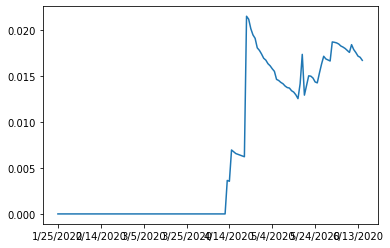

In [20]:
row = rates_by_state_df.iloc[50, 3:148]
row.plot(kind='line')

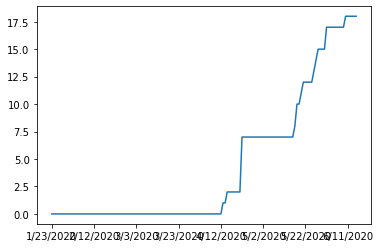

In [21]:
row = deaths_by_state_df.iloc[50, 3:148]
row.plot(kind='line')

In [22]:
#cases_by_state_df['6/15/2020'] = cases_by_state_df['6/15/2020']/cases_by_state_df['population']
#list_of_columns = [column for column in cases_by_state_df.columns if column not in ['countyFIPS', 'stateFIPS','population']

cases_by_state_df.head()

,countyFIPS,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,population
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,62,0,0,0,0,0,0,0,0,...,544,563,573,593,610,625,652,661,664,731545
AL,71489,68,0,0,0,0,0,0,0,0,...,20166,20590,21071,21626,22474,23333,24220,25235,26272,4903185
AR,380625,380,0,0,0,0,0,0,0,0,...,9424,9736,10076,10366,10814,11546,12094,12499,12917,3017804
AZ,60208,64,0,0,0,0,1,1,1,1,...,26889,27677,28296,29852,31263,32918,34458,35691,36705,7278717
CA,357364,360,0,0,0,0,2,3,3,4,...,131348,133884,136863,139736,143238,146999,150314,152969,155687,39512223


In [23]:
# list_of_columns = [column for column in cases_by_state_df.columns if column not in ['countyFIPS', 'stateFIPS','population']]
# list_of_columns

In [24]:
# cases_by_state_df.loc[:,list_of_columns] = cases_by_state_df.loc[:,list_of_columns] / cases_by_state_df['population']

In [25]:
# def divide(column1):
#     column1 / cases_by_state_df['population']
#     print(column1 / cases_by_state_df['population'])

In [26]:
# divide (19)


In [27]:
# cases_by_state_df.iloc[:,2:148] = cases_by_state_df.iloc[:, 2:148].apply(cases_by_state_df.iloc[:, 2:148]/cases_by_state_df['population'], errors='coerce')